### Background : 
You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

# Objective:

To predict which customer is more likely to purchase the newly introduced travel package.

# Data Description:

Customer details:

* CustomerID: Unique customer ID
* ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
* Age: Age of customer
* TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
* CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
* Occupation: Occupation of customer
* Gender: Gender of customer
* NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
* PreferredPropertyStar: Preferred hotel property rating by customer
* MaritalStatus: Marital status of customer
* NumberOfTrips: Average number of trips in a year by customer
* Passport: The customer has a passport or not (0: No, 1: Yes)
* OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
* NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
* Designation: Designation of the customer in the current organization
* MonthlyIncome: Gross monthly income of the customer

Customer interaction data: 

- PitchSatisfactionScore: Sales pitch satisfaction score
- ProductPitched: Product pitched by the salesperson
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
- DurationOfPitch: Duration of the pitch by a salesperson to the customer


In [ ]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Library to split data 
from sklearn.model_selection import train_test_split

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score,f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV

In [ ]:
import scipy.stats as stats
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor

### Read the dataset

In [ ]:
tourism = pd.read_excel("Tourism.xlsx",sheet_name='Tourism')

In [ ]:
# copying data to another varaible to avoid any changes to original data
data=tourism.copy()

### View the first and last 5 rows of the dataset.

In [ ]:
data.head()

In [ ]:
data.tail()

### Understand the shape of the dataset.

In [ ]:
data.shape

* There are 4888 observations and 20 columns in the dataset

### Check the data types of the columns for the dataset.

In [ ]:
data.info()

**Observations -**
* Variables are integer , float or object types.
* We can convert the object type columns to categories.

### Missing value treatment and Value correction of Data Entry Issue

In [ ]:
data.loc[data.Gender == "Fe Male","Gender"] = "Female"

In [ ]:
data['Age'].fillna(data['Age'].median(), inplace = True)

In [ ]:
data['TypeofContact'].fillna(data['TypeofContact'].mode()[0], inplace = True)

In [ ]:
 data['DurationOfPitch'].fillna(data['DurationOfPitch'].median(), inplace = True)

In [ ]:
data['NumberOfFollowups'].fillna(data['NumberOfFollowups'].median(), inplace = True)

In [ ]:
data['PreferredPropertyStar'].fillna(data['PreferredPropertyStar'].median(), inplace = True)

In [ ]:
data['NumberOfTrips'].fillna(data['NumberOfTrips'].median(), inplace = True)

In [ ]:
data['NumberOfChildrenVisiting'].fillna(data['NumberOfChildrenVisiting'].median(), inplace = True)

In [ ]:
data['MonthlyIncome'].fillna(data['MonthlyIncome'].median(), inplace = True)

In [ ]:
data.info()

### Fixing the data types


In [ ]:
cols = data.select_dtypes(['object'])
cols.columns

In [ ]:
for i in cols.columns:
    data[i] = data[i].astype('category')

In [ ]:
data.info()

`we can see that the memory usage has decreased from 763.9 KB to 564.5 KB`, this technique is generally useful for bigger datasets.

### Summary of the dataset.

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


**Observations -**
* CustomerID is an ID variable and not useful for predictive modelling.
* Age of the employees range from 18 to 61 years and the average age is 37 years.
* Monthly Income has a high range and the difference in mean and median indicate the presence of outliers.

In [185]:
data.CustomerID.nunique()

4888

In [186]:
data.drop('CustomerID',axis=1,inplace=True)

In [187]:
data[data.duplicated()].count()

ProdTaken                   141
Age                         141
TypeofContact               141
CityTier                    141
DurationOfPitch             141
Occupation                  141
Gender                      141
NumberOfPersonVisiting      141
NumberOfFollowups           141
ProductPitched              141
PreferredPropertyStar       141
MaritalStatus               141
NumberOfTrips               141
Passport                    141
PitchSatisfactionScore      141
OwnCar                      141
NumberOfChildrenVisiting    141
Designation                 141
MonthlyIncome               141
dtype: int64

In [20]:
data.describe(include=['category']).T

,count,unique,top,freq
TypeofContact,4863,2,Self Enquiry,3444
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842


**Observations -**
* More customers are contacted by 'Self Enquiry'.
* Most of the  Customers are Male  , salaried and married .
* Basic package is prefered by customers
* Executive Customers are prone to buy the product.

### EDA

### Univariate analysis

In [21]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Observations on ProdTaken                 

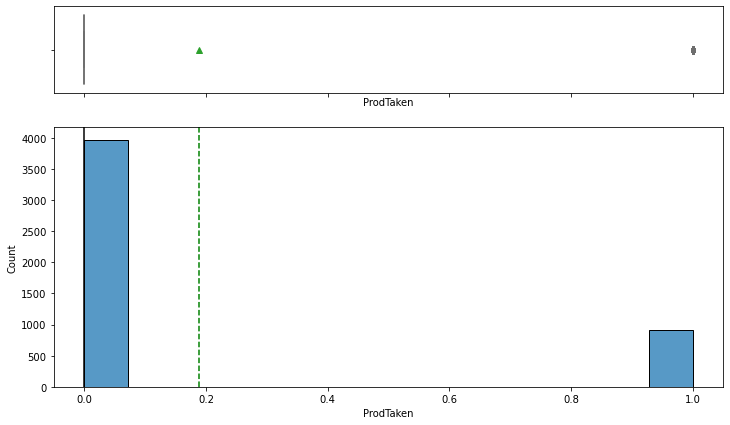

In [22]:
histogram_boxplot(data, "ProdTaken")

very less customers purchased product compared to non buyers.

### Observations on Age                         

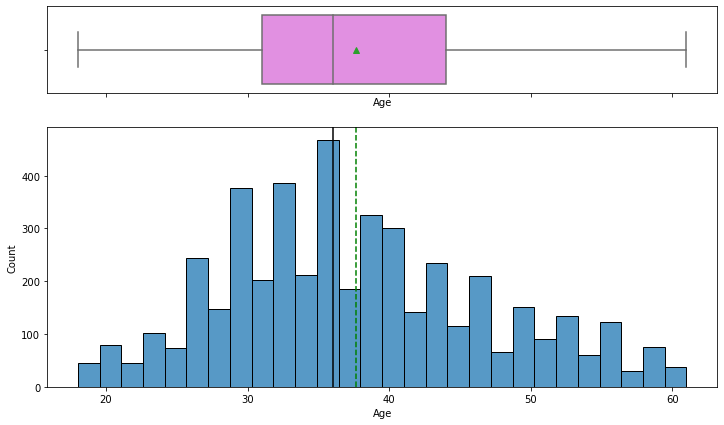

In [23]:
histogram_boxplot(data,"Age")

* Age is looking normally distributed.

### Observations on CityTier                  

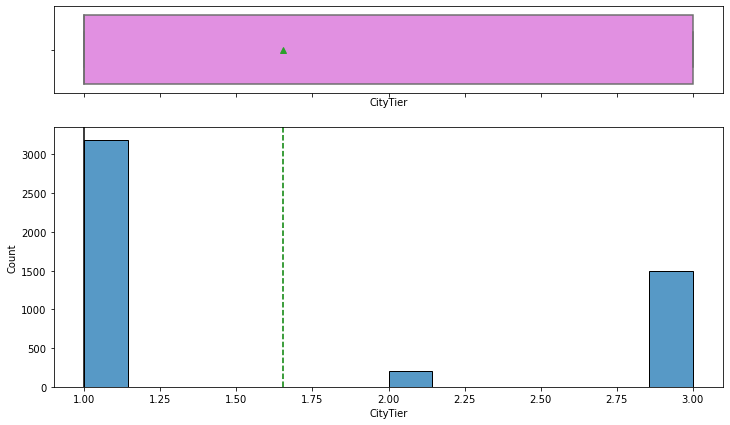

In [25]:
histogram_boxplot(data,"CityTier")

* Tier1 customers are high in number and then Tier 3 followed by Tier 2.

### Observations on DurationOfPitch

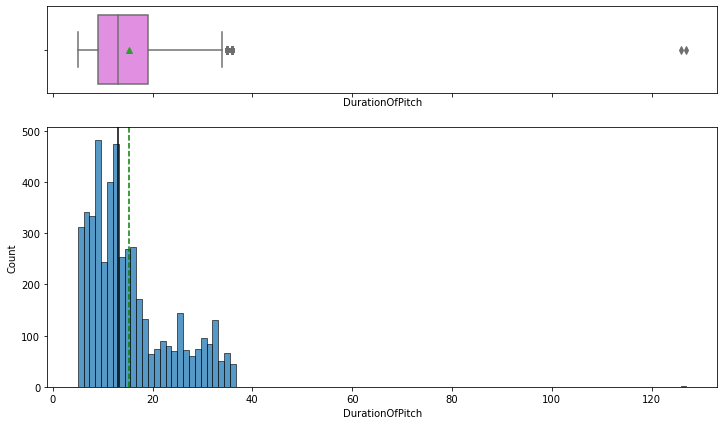

In [233]:
histogram_boxplot(data,"DurationOfPitch")

* DurationOfPitch is right skewed.

### Observations on NumberOfPersonVisiting

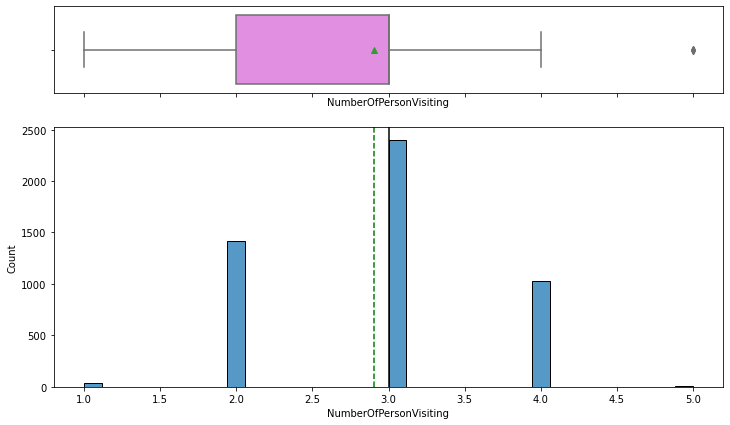

In [232]:
histogram_boxplot(data,"NumberOfPersonVisiting")

* Normally NumberOfPersonVisiting is 3  is high and then 2 followed by 4.

### Observations on NumberOfFollowups

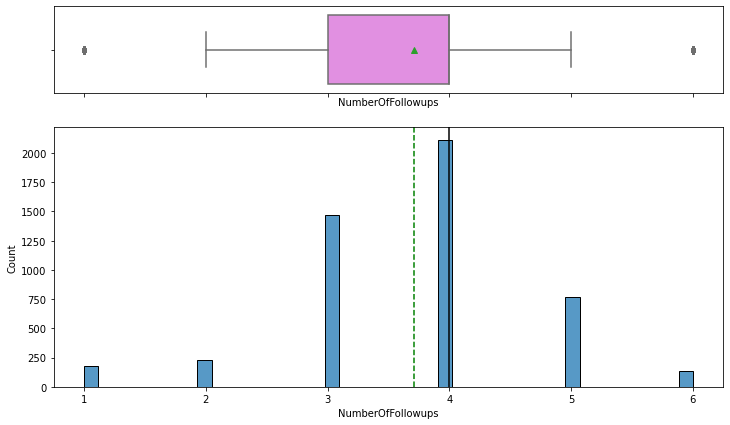

In [234]:
histogram_boxplot(data,"NumberOfFollowups")

* Mostly 4 follow ups did by the sales person.

### Observations on PreferredPropertyStar

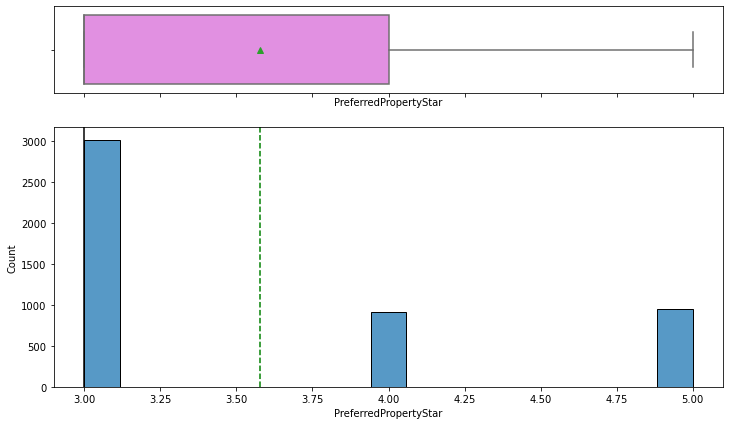

In [235]:
histogram_boxplot(data,"PreferredPropertyStar")

* 3 is the highest preferred hotel property rating by customer
* Then 5 star followed 4 star.

### Observations on NumberOfTrips

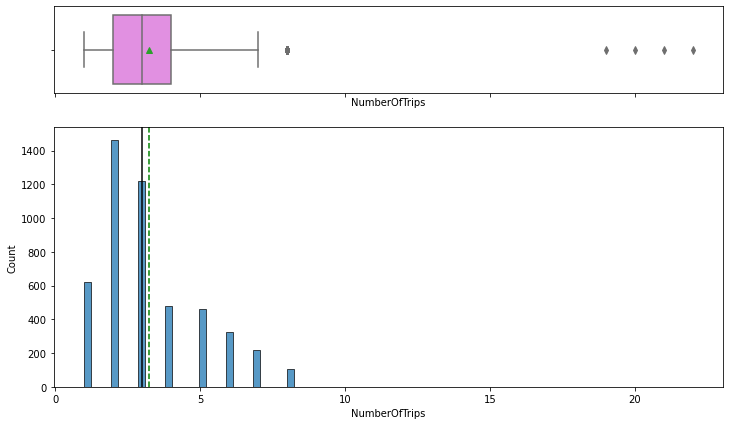

In [236]:
histogram_boxplot(data,"NumberOfTrips")

* NumberOfTrips is right skewed and 2 trips is the highest.

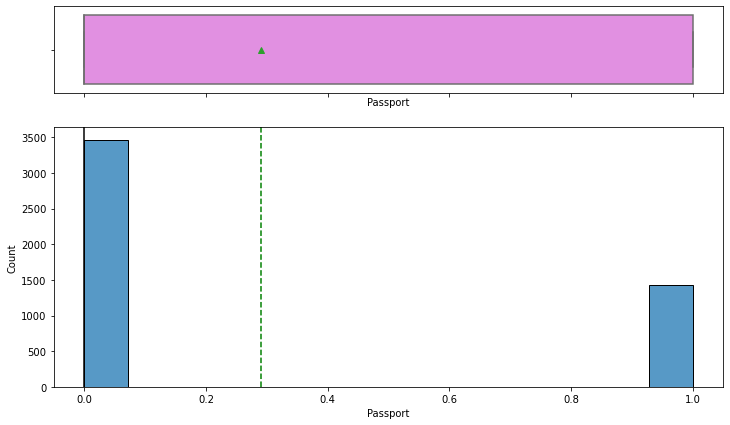

In [237]:
histogram_boxplot(data,"Passport")

* Customers with passport are less compared to non passporters.


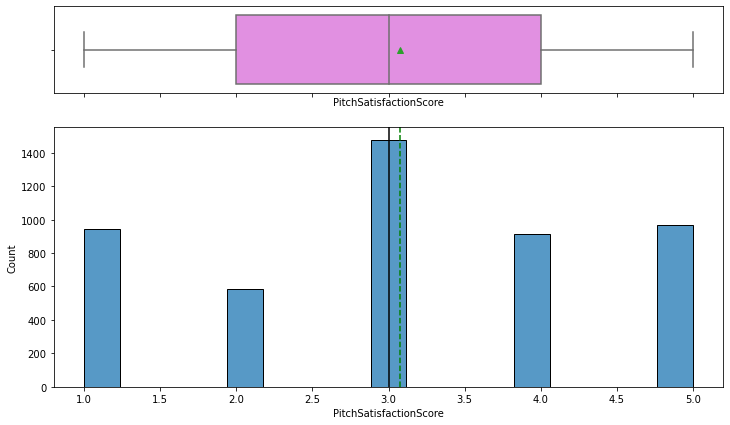

In [238]:
histogram_boxplot(data,"PitchSatisfactionScore")

* 3 is the highest PitchSatisfactionScore

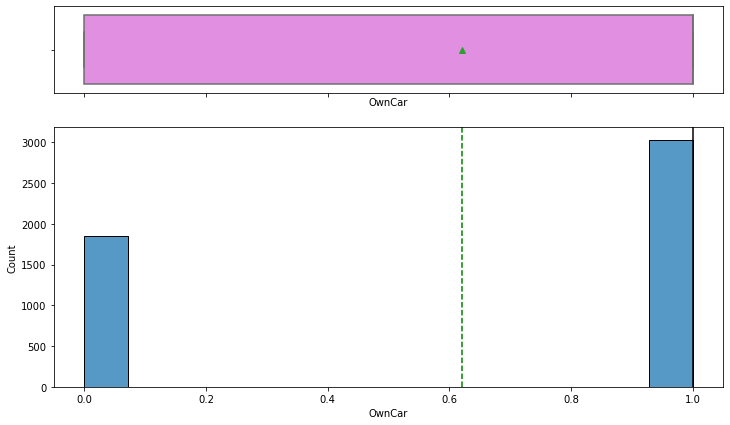

In [29]:
histogram_boxplot(data,"OwnCar")

* Most of the customers own a Car.

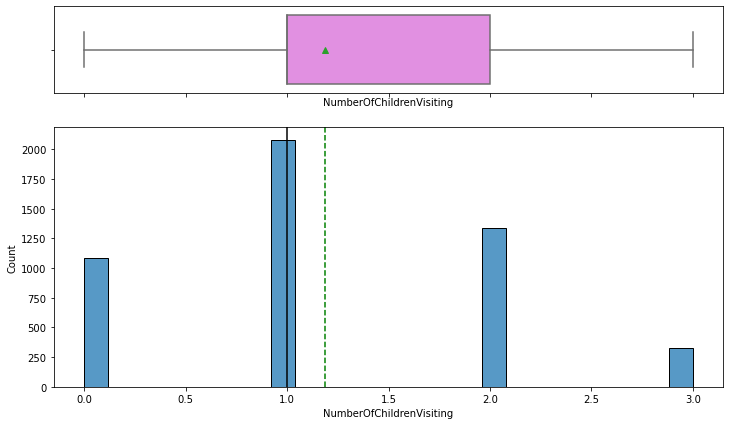

In [30]:
histogram_boxplot(data,"NumberOfChildrenVisiting")

* Most times 1 or 2 or no children or 3 be there with customers.

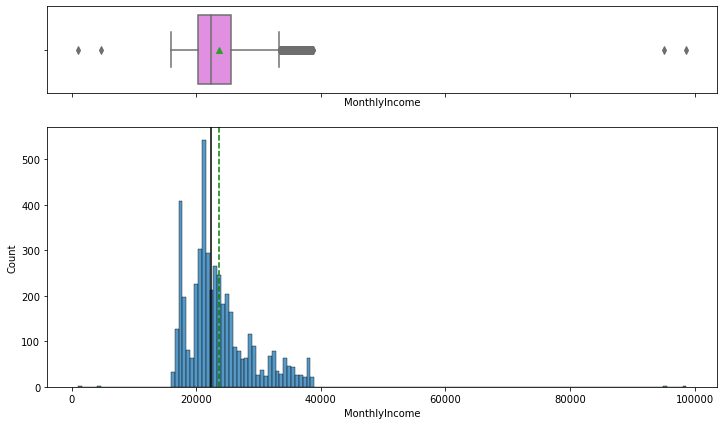

In [31]:
histogram_boxplot(data,"MonthlyIncome")

* Income distribution is right-skewed.
* From the boxplot we can see that there are a few outliers who earn much higher than the rest of the employees.

In [239]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on Class

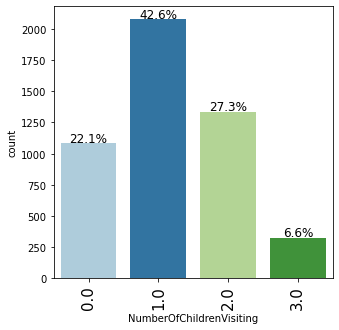

In [35]:
labeled_barplot(data,"NumberOfChildrenVisiting",perc=True)

* 42.6% customers are with 1 child.

### Observations on Preg

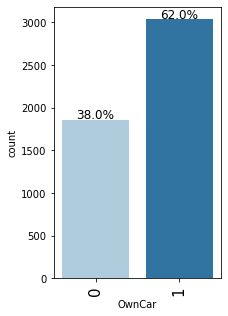

In [36]:
labeled_barplot(data,"OwnCar",perc=True)

62% customers Own a car.

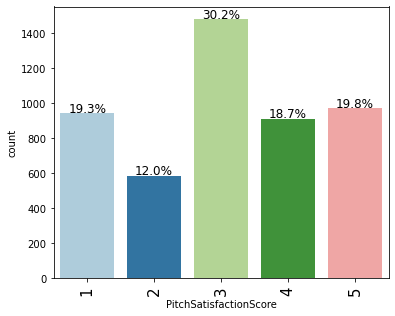

In [37]:
labeled_barplot(data,"PitchSatisfactionScore",perc=True)

PitchSatisfactionScore is 3 for 30.2% 

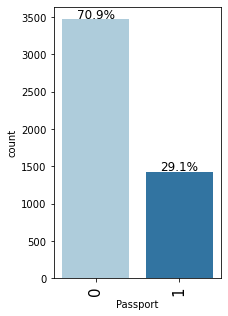

In [38]:
labeled_barplot(data,"Passport",perc=True)

70.9% customers have no passport.

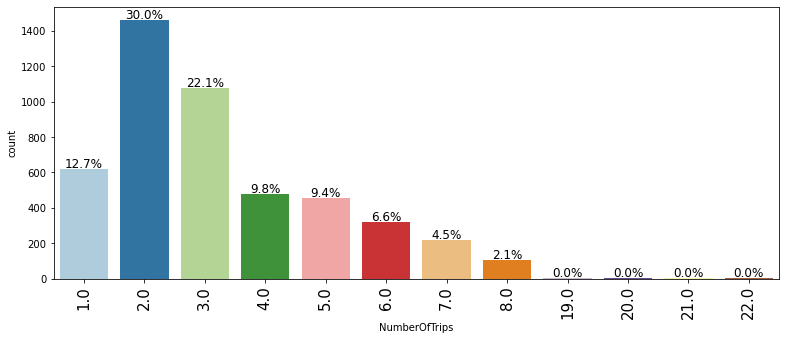

In [39]:
labeled_barplot(data,"NumberOfTrips",perc=True)

* 30.0% customers have two trips and 22.1% customers have 3 trips and 12.7% customers have 1 trip.

### Bivariate Analysis

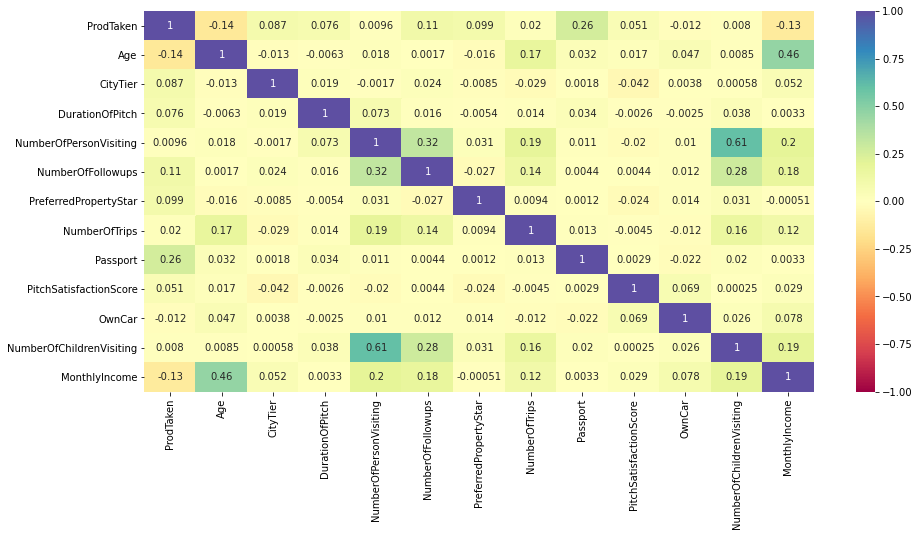

In [241]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,cmap="Spectral")
plt.show()

**Observations-**
* NumberOfChildrenVisiting is highly correlated to NumberOfPerson Visiting.
* Monthly income is correlated to age.
* No of followups is correlated to Numberofpersonvisting.

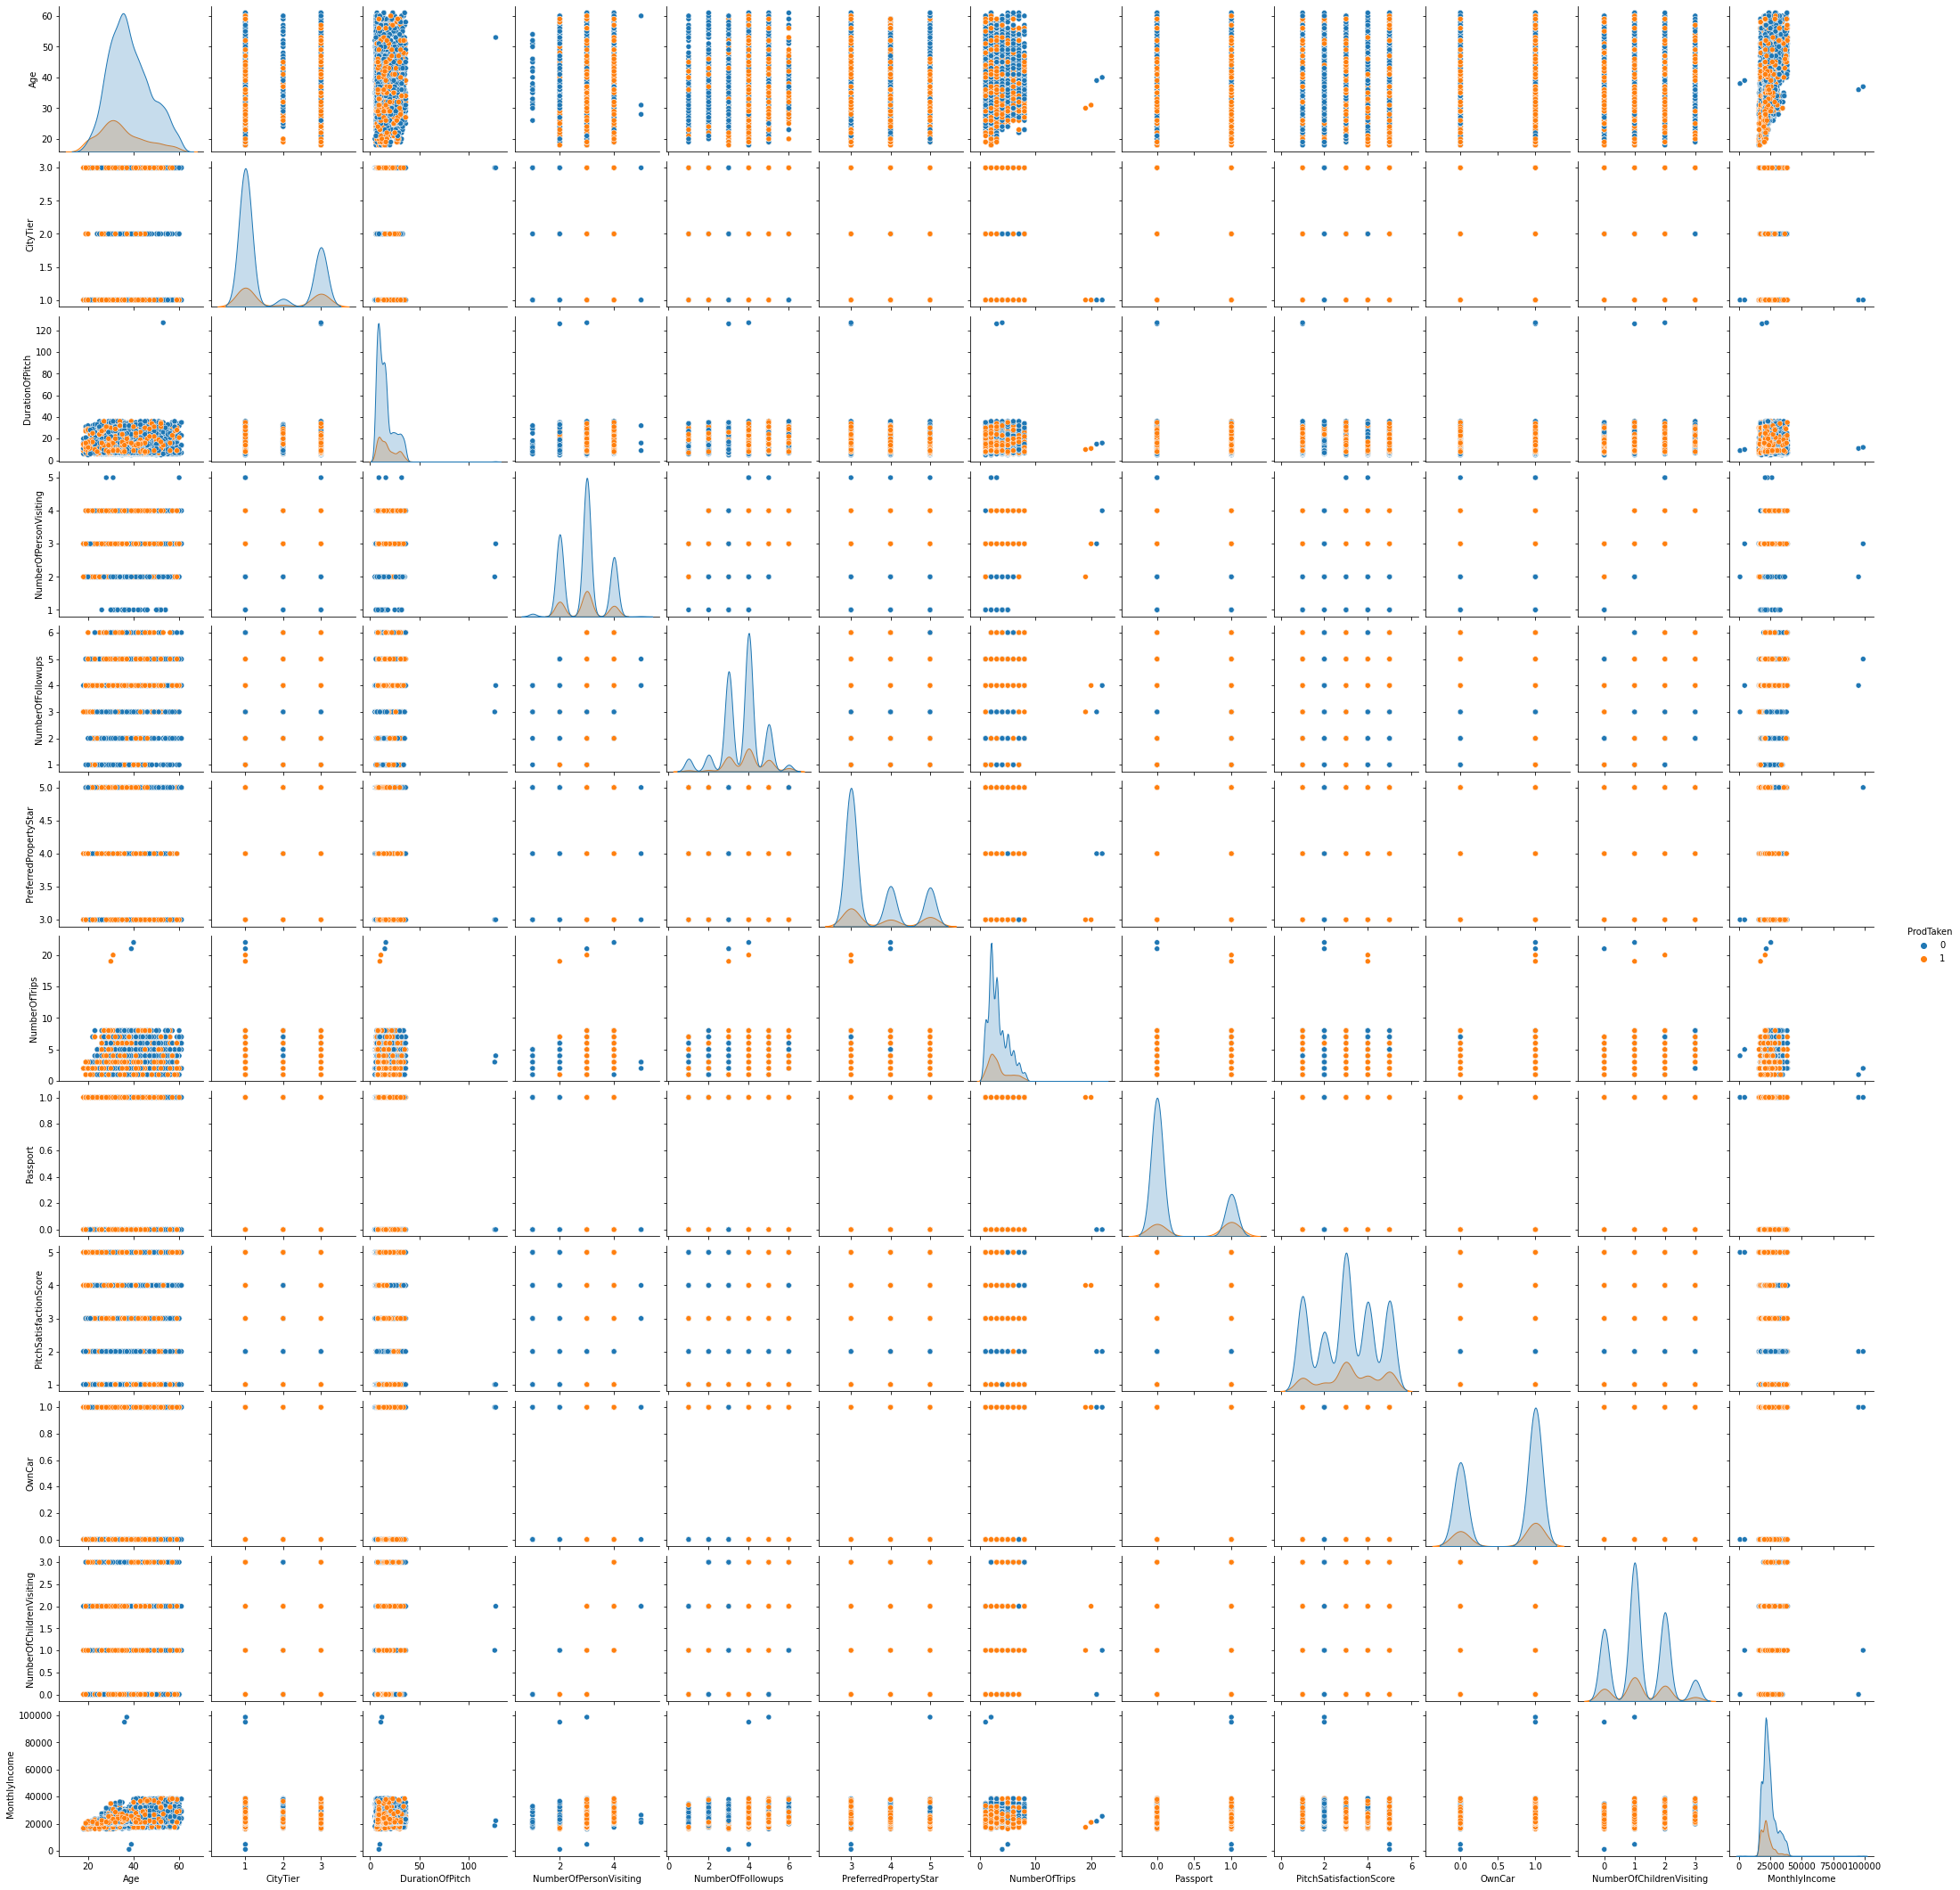

In [42]:
sns.pairplot(data=data,hue="ProdTaken")
plt.show()

* We can see varying distributions in variables for ProdTaken, we should investigate it further. 

### * ProdTaken vs 'Age','TypeofContact','CityTier','DurationOfPitch','Occupation','Gender','NumberOfPersonVisiting','ProductPitched', 'NumberOfFollowups','PreferredPropertyStar','MaritalStatus','NumberOfTrips','Passport','PitchSatisfactionScore',  'OwnCar','NumberOfChildrenVisiting','Designation','MonthlyIncome'

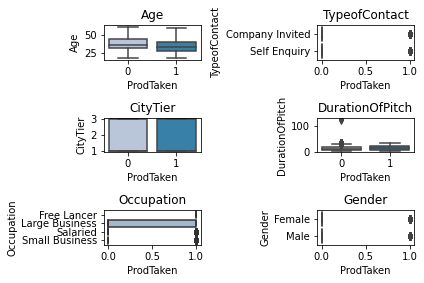

In [242]:
cols = data[['Age','TypeofContact','CityTier','DurationOfPitch','Occupation','Gender']].columns.tolist()


for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data["ProdTaken"],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

* young customers puchased more

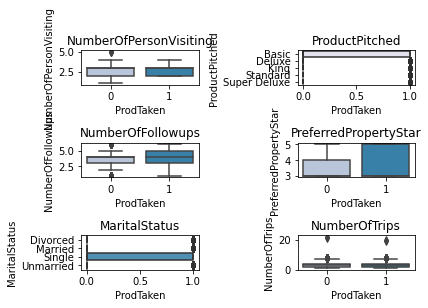

In [243]:
cols = data[['NumberOfPersonVisiting','ProductPitched',
             'NumberOfFollowups','PreferredPropertyStar','MaritalStatus',
            'NumberOfTrips']].columns.tolist()


for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data["ProdTaken"],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

* More no of follow ups done by the customers who purchased the package.

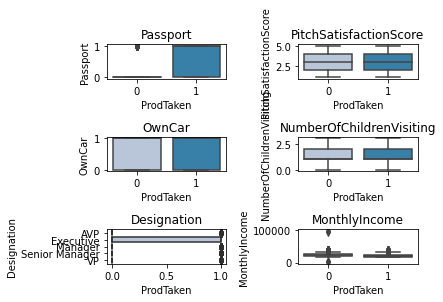

In [244]:
cols = data[['Passport','PitchSatisfactionScore',
             'OwnCar','NumberOfChildrenVisiting','Designation','MonthlyIncome'  ]].columns.tolist()


for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data["ProdTaken"],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

customers with passport are more prone to purchase the package.

In [48]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

ProdTaken     0    1   All
Age                       
All        3786  876  4662
29.0        121   57   178
30.0        151   48   199
34.0        167   44   211
31.0        162   41   203
33.0        149   40   189
32.0        157   40   197
26.0         69   37   106
35.0        203   34   237
27.0        108   30   138
36.0        204   27   231
28.0        121   26   147
20.0         13   25    38
41.0        131   24   155
37.0        161   24   185
40.0        123   23   146
21.0         18   23    41
19.0         11   21    32
25.0         54   20    74
42.0        122   20   142
24.0         38   18    56
45.0         98   18   116
44.0         88   17   105
51.0         73   17    90
38.0        161   15   176
22.0         31   15    46
39.0        136   14   150
52.0         54   14    68
23.0         33   13    46
47.0         76   12    88
56.0         46   12    58
50.0         74   12    86
59.0         32   12    44
58.0         20   11    31
48.0         54   11    65
4

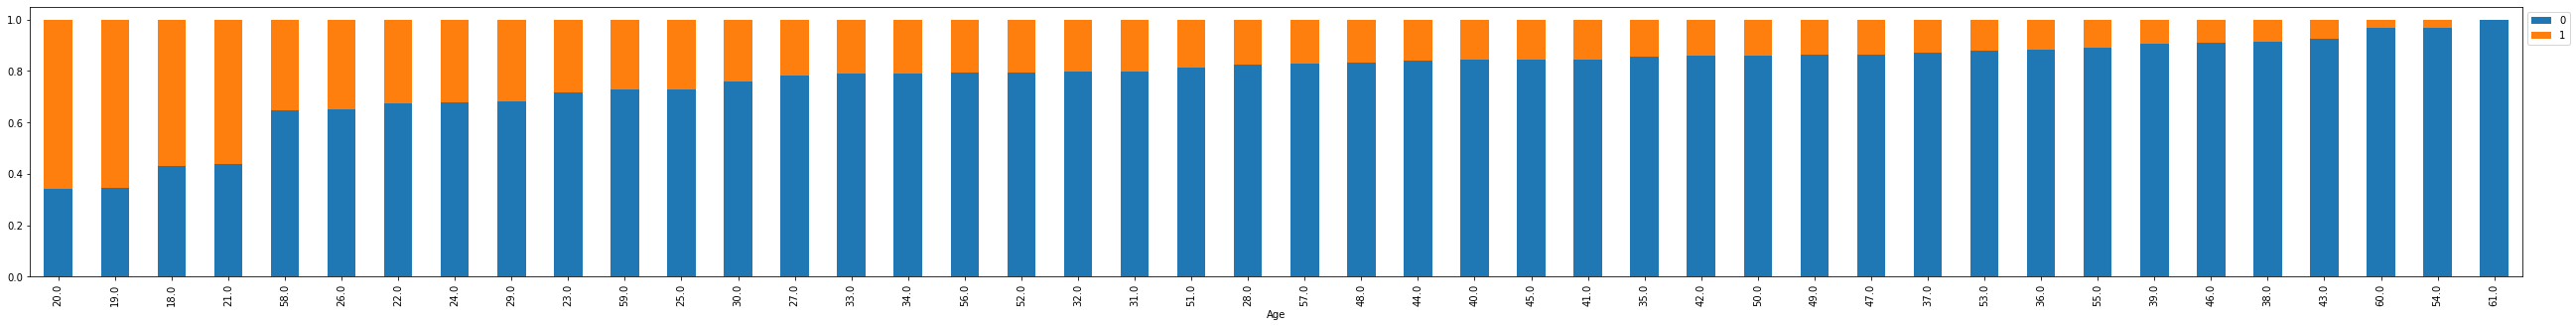

In [49]:
stacked_barplot(data, "Age", "ProdTaken")

* Customers with age 19 to 51 are the customers who are  more prone to purchase the package

ProdTaken           0    1   All
TypeofContact                   
All              3968  920  4888
Self Enquiry     2859  610  3469
Company Invited  1109  310  1419
------------------------------------------------------------------------------------------------------------------------


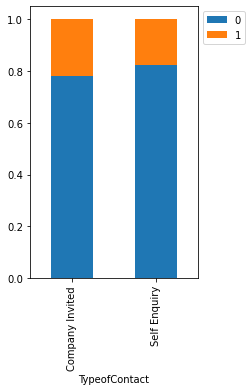

In [245]:

stacked_barplot(data, "TypeofContact", "ProdTaken")

Self Enquiry is the highest type of contact for the package.

ProdTaken           0    1   All
DurationOfPitch                 
All              3762  875  4637
9.0               404   79   483
8.0               273   60   333
16.0              218   56   274
15.0              217   52   269
7.0               294   48   342
10.0              199   45   244
14.0              212   41   253
6.0               268   39   307
11.0              168   37   205
12.0              162   33   195
13.0              191   32   223
31.0               52   31    83
30.0               65   30    95
17.0              148   24   172
22.0               66   23    89
19.0               36   21    57
23.0               58   21    79
29.0               53   21    74
18.0               56   19    75
20.0               46   19    65
28.0               44   17    61
21.0               57   16    73
24.0               54   16    70
32.0               59   15    74
27.0               58   14    72
25.0               59   14    73
26.0               60   12    72
33.0      

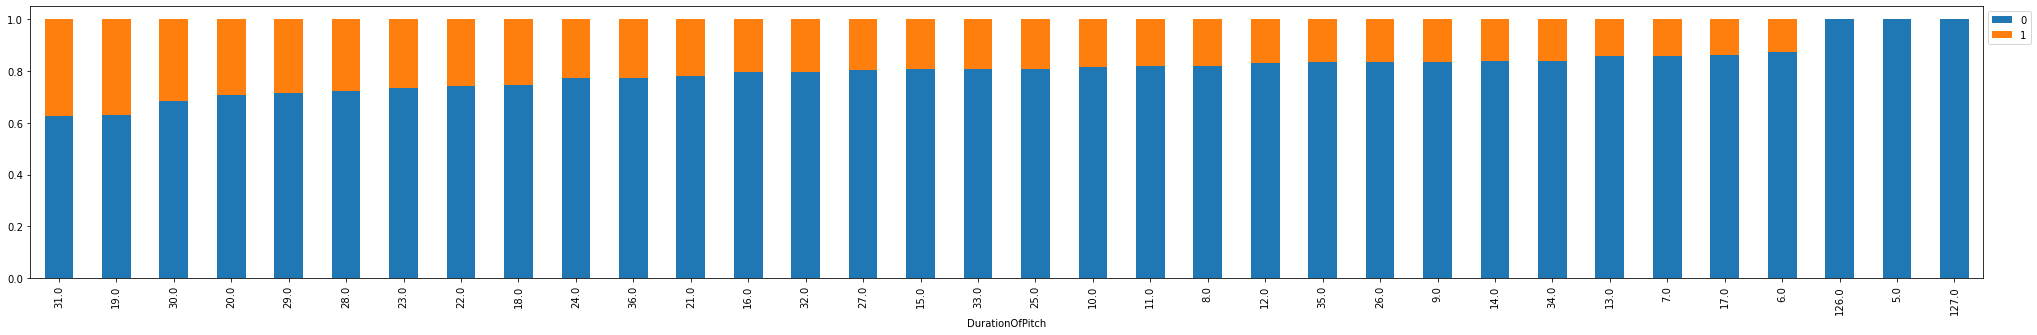

In [51]:

stacked_barplot(data, "DurationOfPitch", "ProdTaken")

DurationOfPitch is less then more likely to purchase the package. when its increasing the the chances are reducing. 

ProdTaken          0    1   All
Occupation                     
All             3968  920  4888
Salaried        1954  414  2368
Small Business  1700  384  2084
Large Business   314  120   434
Free Lancer        0    2     2
------------------------------------------------------------------------------------------------------------------------


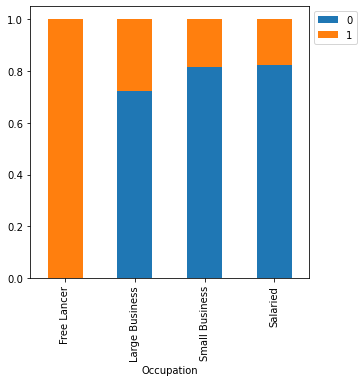

In [52]:
stacked_barplot(data, "Occupation", "ProdTaken")

Most of the customers who purchase the package are salried

ProdTaken     0    1   All
Gender                    
All        3968  920  4888
Male       2338  578  2916
Female     1630  342  1972
------------------------------------------------------------------------------------------------------------------------


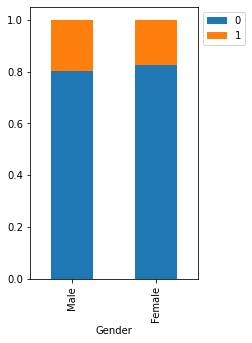

In [105]:
stacked_barplot(data, "Gender", "ProdTaken")

Male customers are more purchasing the package

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
All                     3968  920  4888
3                       1942  460  2402
2                       1151  267  1418
4                        833  193  1026
1                         39    0    39
5                          3    0     3
------------------------------------------------------------------------------------------------------------------------


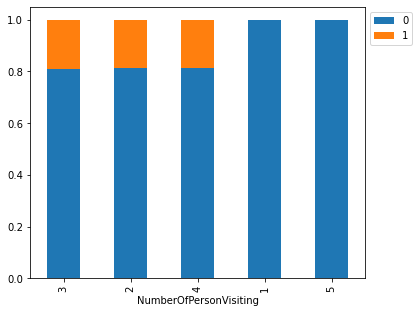

In [107]:
stacked_barplot(data, "NumberOfPersonVisiting", "ProdTaken")

Number of person visting is 3 for most of the customers

ProdTaken          0    1   All
ProductPitched                 
All             3968  920  4888
Basic           1290  552  1842
Deluxe          1528  204  1732
Standard         618  124   742
King             210   20   230
Super Deluxe     322   20   342
------------------------------------------------------------------------------------------------------------------------


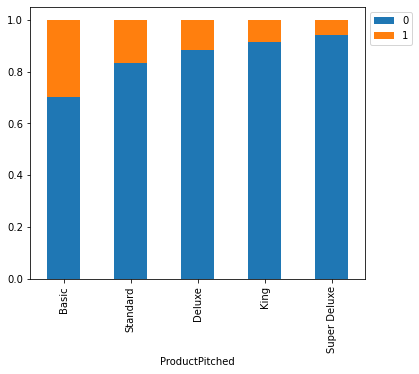

In [108]:
stacked_barplot(data, "ProductPitched", "ProdTaken")

ProdTaken             0    1   All
NumberOfFollowups                 
All                3968  920  4888
4.0                1726  387  2113
3.0                1222  244  1466
5.0                 577  191   768
6.0                  82   54   136
2.0                 205   24   229
1.0                 156   20   176
------------------------------------------------------------------------------------------------------------------------


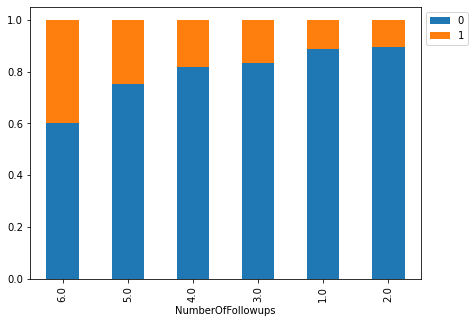

In [109]:
stacked_barplot(data, "NumberOfFollowups", "ProdTaken")

Number of followups  is 4 for most number of customers.

ProdTaken                 0    1   All
PreferredPropertyStar                 
All                    3968  920  4888
3.0                    2531  488  3019
5.0                     706  250   956
4.0                     731  182   913
------------------------------------------------------------------------------------------------------------------------


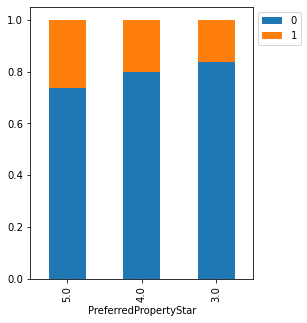

In [110]:
stacked_barplot(data, "PreferredPropertyStar", "ProdTaken")

most customers rated 3.

ProdTaken         0    1   All
MaritalStatus                 
All            3968  920  4888
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
Divorced        826  124   950
------------------------------------------------------------------------------------------------------------------------


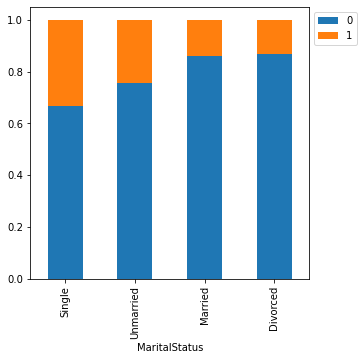

In [111]:
stacked_barplot(data, "MaritalStatus", "ProdTaken")

ProdTaken         0    1   All
NumberOfTrips                 
All            3968  920  4888
2.0            1293  311  1604
3.0             862  217  1079
1.0             508  112   620
6.0             258   64   322
5.0             396   62   458
7.0             156   62   218
4.0             417   61   478
8.0              76   29   105
19.0              0    1     1
20.0              0    1     1
21.0              1    0     1
22.0              1    0     1
------------------------------------------------------------------------------------------------------------------------


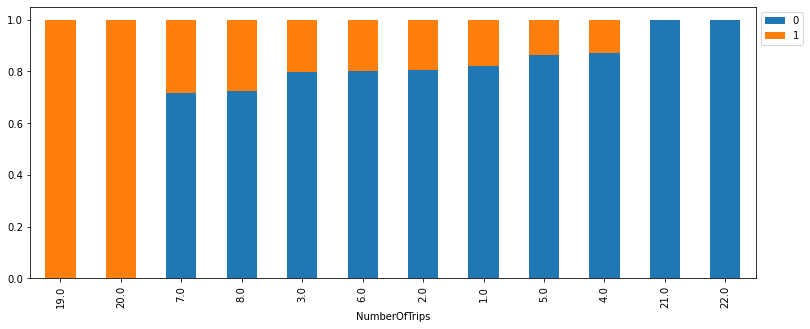

In [112]:
stacked_barplot(data, "NumberOfTrips", "ProdTaken")

2 is the highest trip number for the customers who purchased the package

ProdTaken     0    1   All
Passport                  
All        3968  920  4888
1           928  494  1422
0          3040  426  3466
------------------------------------------------------------------------------------------------------------------------


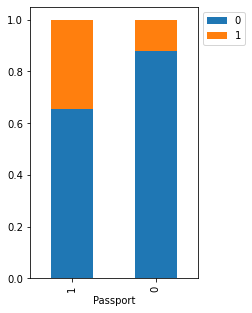

In [113]:
stacked_barplot(data, "Passport", "ProdTaken")

customers with passport and without passport too are purchasing the package

ProdTaken                  0    1   All
PitchSatisfactionScore                 
All                     3968  920  4888
3                       1162  316  1478
5                        760  210   970
4                        750  162   912
1                        798  144   942
2                        498   88   586
------------------------------------------------------------------------------------------------------------------------


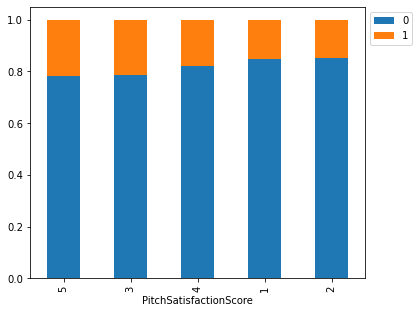

In [114]:
stacked_barplot(data, "PitchSatisfactionScore", "ProdTaken")

3 is the highest PitchSatisfactionScore for who purchase the package.

ProdTaken     0    1   All
OwnCar                    
All        3968  920  4888
1          2472  560  3032
0          1496  360  1856
------------------------------------------------------------------------------------------------------------------------


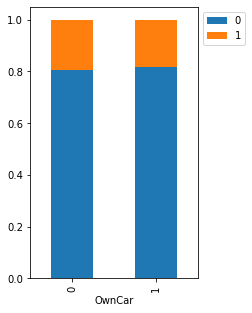

In [115]:
stacked_barplot(data, "OwnCar", "ProdTaken")

most customers own a car who puchase the package

ProdTaken                    0    1   All
NumberOfChildrenVisiting                 
All                       3968  920  4888
1.0                       1747  399  2146
2.0                       1082  253  1335
0.0                        880  202  1082
3.0                        259   66   325
------------------------------------------------------------------------------------------------------------------------


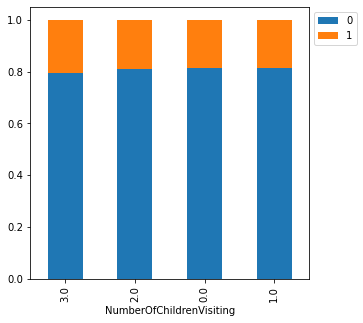

In [116]:
stacked_barplot(data, "NumberOfChildrenVisiting", "ProdTaken")

1,2,0 and 3 are the descending sort order of number of child visting for the customer who purchase the package

ProdTaken          0    1   All
Designation                    
All             3968  920  4888
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
AVP              322   20   342
VP               210   20   230
------------------------------------------------------------------------------------------------------------------------


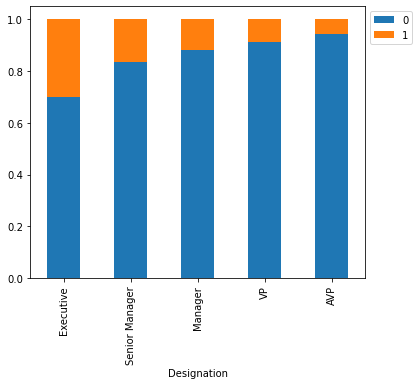

In [117]:
stacked_barplot(data, "Designation", "ProdTaken")

Executives are the ones who purchased more packages.

In [246]:
data.head(5)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Split Data

In [247]:

X = data.drop('ProdTaken',axis=1)
X = pd.get_dummies(X,drop_first=True)
y = data['ProdTaken'] 

In [248]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(3421, 28) (1467, 28)


**The Stratify arguments maintain the original distribution of classes in the target variable while splitting the data into train and test sets.**

In [249]:
y.value_counts(1)

0    0.811784
1    0.188216
Name: ProdTaken, dtype: float64

In [250]:
y_test.value_counts(1)

0    0.811861
1    0.188139
Name: ProdTaken, dtype: float64

## Model evaluation criterion

### The model can make wrong predictions as:
1. Predicting a person doesn't take Package and the person took the Package.
2. Predicting a person has taken Package, and the person doesn't take Package.

### Which case is more important? 
* Predicting a person has taken product, and the person doesn't take product.

### Which metric to optimize?
* We would want Recall to be maximized, the greater the Recall higher the chances of minimizing false negatives or in other words identifying the true positives(i.e. ProdTaken 1) so that the company can take adequate steps to  control losing customers  especially for top-customers thereby optimizing the overall cost by gaining more top customers.

**Let's define a function to provide recall scores on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [251]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [252]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Decision Tree

In [254]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1)

In [255]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

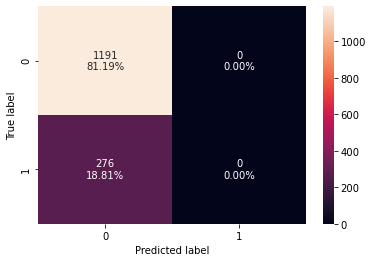

In [256]:
#Creating confusion matrix
confusion_matrix_sklearn(d_tree, X_test, y_test)

In [257]:
dtree_model_train_perf=model_performance_classification_sklearn(dtree, X_train, y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [258]:
dtree_model_test_perf=model_performance_classification_sklearn(dtree, X_test, y_test)
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.873211  0.648551    0.66791  0.658088


### Random Forest

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.916155  0.59058   0.942197  0.726058


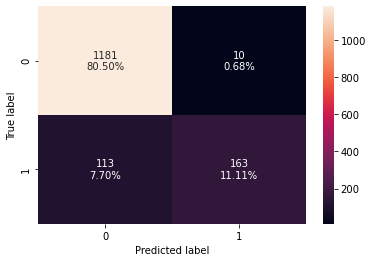

In [259]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

**Random forest with class weights**

In [260]:
rf_wt = RandomForestClassifier(class_weight={0:0.17,1:0.83}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

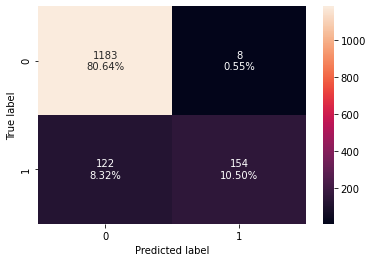

In [261]:
confusion_matrix_sklearn(rf_wt, X_test,y_test)

* Random forest is overfitting the training data as there is a huge difference between training and test scores for all the metrics.
* The test recall is even lower than the decision tree but has a higher test precision.

In [262]:
rf_wt_model_train_perf=model_performance_classification_sklearn(rf_wt, X_train,y_train)
print("Training performance \n",rf_wt_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [263]:
rf_wt_model_test_perf=model_performance_classification_sklearn(rf_wt, X_test,y_test)
print("Testing performance \n",rf_wt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.911384  0.557971   0.950617  0.703196


### Bagging Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.995031  0.973602        1.0  0.986625
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.91002  0.608696      0.875  0.717949


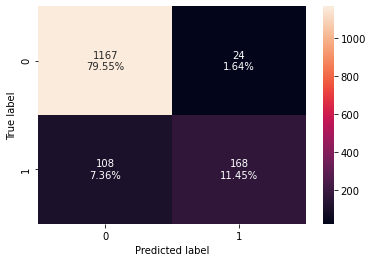

In [264]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print("Training performance:\n",bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print("Testing performance:\n",bagging_classifier_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

* Bagging classifier giving a similar performance as random forest.
* It is also overfitting the training data and lower test recall than decision trees.

**Bagging Classifier with weighted decision tree**

In [265]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.17,
                                                                      1: 0.83},
                                                        random_state=1),
                  random_state=1)

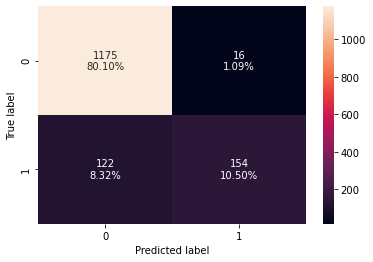

In [266]:
confusion_matrix_sklearn(bagging_wt,X_test,y_test)

In [267]:
bagging_wt_model_train_perf=model_performance_classification_sklearn(bagging_wt,X_train,y_train)
print("Training performance \n",bagging_wt_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.993569  0.968944   0.996805  0.982677


In [268]:
bagging_wt_model_test_perf=model_performance_classification_sklearn(bagging_wt, X_test, y_test)
print("Testing performance \n",bagging_wt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0   0.90593  0.557971   0.905882  0.690583


### Tuning Decision Tree

In [269]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.35,1:0.65},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,10), 
              'min_samples_leaf': [5, 7, 10, 15],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.35, 1: 0.65}, max_depth=5,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       min_samples_leaf=5, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.759777  0.839572   0.613281  0.708804  0.778358
Testing performance:
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.692641  0.753086   0.544643  0.632124  0.706543


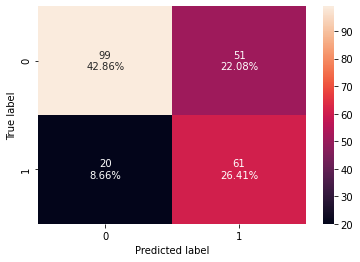

In [45]:
#Calculating different metrics
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator,X_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

* The test recall has increased significantly after hyperparameter tuning and the decision tree is giving a generalized performance.

### Tuning Random Forest

In [ ]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.35,1:0.65},random_state=1)

parameters = {  
                'max_depth': list(np.arange(3,10,1)),
                'max_features': np.arange(0.6,1.1,0.1),
                'max_samples': np.arange(0.7,1.1,0.1),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(30,160,20),
                'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

In [ ]:
#Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

* The test recall has increased significantly after hyperparameter tuning but the  model is still overfitting the training data.

### Tuning Bagging Classifier

In [ ]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

Training performance:
    Accuracy    Recall  Precision        F1   ROC-AUC
0   0.98324  0.957219   0.994444  0.975477  0.977181
Testing performance:
    Accuracy    Recall  Precision        F1   ROC-AUC
0   0.74026  0.518519   0.666667  0.583333  0.689259


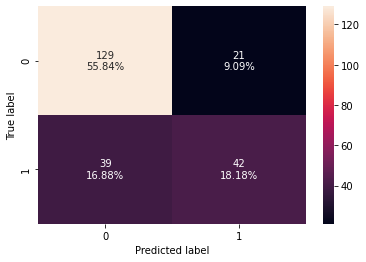

In [49]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print("Training performance:\n",bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print("Testing performance:\n",bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

* Surprisingly, the test recall has decreased after hyperparameter tuning and the  model is still overfitting the training data.

## Comparing all the models

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T,dtree_estimator_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned"]
print("Training performance comparison:")
models_train_comp_df

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T,dtree_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T, bagging_estimator_tuned_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned"]
print("Testing performance comparison:")
models_test_comp_df

* A tuned decision tree is the best model for our data as it has the highest test recall and giving a generalized performance as compared to other models.

### Feature importance of tuned decision tree

In [ ]:
# Text report showing the rules of a decision tree -
feature_names = list(X_train.columns)
print(tree.export_text(dtree_estimator,feature_names=feature_names,show_weights=True))

In [ ]:
feature_names = X_train.columns
importances = dtree_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Feature importance of Random Forest

In [ ]:
print (pd.DataFrame(rf.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

In [ ]:
feature_names = X_train.columns

In [ ]:
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Building Models-Boosting

- We'll fit different models on the train data and observe their performance. 
- We'll try to improve that performance by tuning some hyperparameters available for that algorithm.
- We'll use GridSearchCv for hyperparameter tuning and `r_2 score` to optimize the model.
- R-square - `Coefficient of determination` is used to evaluate the performance of a regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variables.
- Let's start by creating a function to get model scores, so that we don't have to use the same codes repeatedly.

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
##  Function to calculate r2_score and RMSE on train and test data
def get_model_score(model, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_r2=metrics.r2_score(y_train,pred_train)
    test_r2=metrics.r2_score(y_test,pred_test)
    train_rmse=np.sqrt(metrics.mean_squared_error(y_train,pred_train))
    test_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_test))
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-sqaure on training set : ",metrics.r2_score(y_train,pred_train))
        print("R-square on test set : ",metrics.r2_score(y_test,pred_test))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train,pred_train)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test,pred_test)))
    
    # returning the list with train and test scores
    return score_list

## Decision Tree Model

In [ ]:
dtree=DecisionTreeRegressor(random_state=1)
dtree.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
dtree_model_train_perf=model_performance_regression(dtree, X_train,y_train)
print("Training performance \n",dtree_model_train_perf)

In [ ]:
dtree_model_test_perf=model_performance_regression(dtree, X_test,y_test)
print("Testing performance \n",dtree_model_test_perf)

- The Decision tree model with default parameters is overfitting the train data.
- Let's see if we can reduce overfitting and improve performance on test data by tuning hyperparameters.

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier. 
dtree_tuned = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': list(np.arange(2,20)) + [None], 
              'min_samples_leaf': [1, 3, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10, 15] + [None],
              'min_impurity_decrease': [0.001, 0.01, 0.1, 0.0]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train)

In [ ]:
dtree_tuned_model_train_perf = model_performance_regression(dtree_tuned, X_train,y_train)
print("Training performance \n",dtree_model_train_perf)

In [ ]:
dtree_tuned_model_test_perf = model_performance_regression(dtree_tuned, X_test,y_test)
print("Testing performance \n",dtree_tuned_model_test_perf)

- The overfitting is reduced after hyperparameter tuning and the test score has increased by approx 2%.
- RMSE is also reduced on test data and the model is generalizing better than the decision tree model with default parameters.

**Plotting the feature importance of each variable**

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

In [ ]:
feature_names = X_train.columns
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Random Forest Model


In [ ]:
rf_estimator=RandomForestRegressor(random_state=1)
rf_estimator.fit(X_train,y_train)

In [ ]:
rf_estimator_model_train_perf = model_performance_regression(rf_estimator, X_train,y_train)
print("Training performance \n",rf_estimator_model_train_perf)

In [ ]:
rf_estimator_model_test_perf = model_performance_regression(rf_estimator, X_test,y_test)
print("Testing performance \n",rf_estimator_model_test_perf)

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier. 
rf_tuned = RandomForestRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {  
                'max_depth':[4, 6, 8, 10, None],
                'max_features': ['sqrt','log2',None],
                'n_estimators': [80, 90, 100, 110, 120]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

In [ ]:
rf_tuned_model_train_perf = model_performance_regression(rf_tuned, X_train, y_train)
print("Training performance \n",rf_tuned_model_train_perf)

In [ ]:
rf_tuned_model_test_perf = model_performance_regression(rf_tuned, X_test, y_test)
print("Testing performance \n",rf_tuned_model_test_perf)

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

In [ ]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Boosting Models

### AdaBoost Regressor

In [ ]:
ab_regressor=AdaBoostRegressor(random_state=1)
ab_regressor.fit(X_train,y_train)

In [ ]:
ab_regressor_model_train_perf = model_performance_regression(ab_regressor, X_train,y_train)
print("Training performance \n",ab_regressor_model_train_perf)

In [ ]:
ab_regressor_model_test_perf = model_performance_regression(ab_regressor, X_test,y_test)
print("Testing performance \n",ab_regressor_model_test_perf)

- AdaBoost is generalizing well but it is giving poor performance, in terms of r2 score as well as RMSE, as compared to the decision tree and random forest model.  

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier. 
ab_tuned = AdaBoostRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(10,100,10), 
              'learning_rate': [1, 0.1, 0.5, 0.01],
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(ab_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
ab_tuned.fit(X_train, y_train)

In [ ]:
ab_tuned_model_train_perf = model_performance_regression(ab_tuned, X_train,y_train)
print("Training performance \n",ab_tuned_model_train_perf)

In [ ]:
ab_tuned_model_test_perf = model_performance_regression(ab_tuned, X_test,y_test)
print("Testing performance \n",ab_tuned_model_train_perf)

In [ ]:
- We can see that there is no significant improvement in the model after hyperparameter tuning.

In [ ]:
# importance of features in the tree building

print(pd.DataFrame(ab_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

In [ ]:
feature_names = X_train.columns
importances = ab_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- hr is the most important feature here, followed by yr and atemp.

### Gradient Boosting Regressor

In [ ]:
gb_estimator=GradientBoostingRegressor(random_state=1)
gb_estimator.fit(X_train,y_train)

In [ ]:
gb_estimator_model_train_perf = model_performance_regression(gb_estimator, X_train,y_train)
print("Training performance \n",gb_estimator_model_train_perf)

In [ ]:
gb_estimator_model_test_perf = model_performance_regression(gb_estimator, X_test, y_test)
print("Testing performance \n",gb_estimator_model_test_perf)

- Gradient boosting is generalizing well and giving decent results but not as good as random forest.

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier. 
gb_tuned = GradientBoostingRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50,200,25), 
              'subsample':[0.7,0.8,0.9,1],
              'max_features':[0.7,0.8,0.9,1],
              'max_depth':[3,5,7,10]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gb_tuned.fit(X_train, y_train)

In [ ]:
gb_tuned_model_train_perf = model_performance_regression(gb_tuned, X_train,y_train)
print("Training performance \n",gb_tuned_model_train_perf)

In [ ]:
gb_tuned_model_test_perf = model_performance_regression(gb_tuned, X_test, y_test)
print("Testing performance \n",gb_tuned_model_test_perf)

- We can see that the model has improved significantly in terms of r2 score and RMSE.
- The r2 score has increased by approx 12% on the test data.
- RMSE has decreased by more than 30 for the test data.

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(gb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

In [ ]:
feature_names = X_train.columns
importances = gb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### XGBoost Regressor

In [ ]:
xgb_estimator=XGBRegressor(random_state=1)
xgb_estimator.fit(X_train,y_train)

In [ ]:
xgb_estimator_model_train_perf = model_performance_regression(xgb_estimator, X_train, y_train)
print("Training performance \n",xgb_estimator_model_train_perf)

In [ ]:
xgb_estimator_model_test_perf = model_performance_regression(xgb_estimator, X_test,y_test)
print("Testing performance \n",xgb_estimator_model_test_perf)

- XGBoost with default parameters is giving almost as good results as the tuned gradient boosting model.

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier. 
xgb_tuned = XGBRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': [75,100,125,150], 
              'subsample':[0.7, 0.8, 0.9, 1],
              'gamma':[0, 1, 3, 5],
              'colsample_bytree':[0.7, 0.8, 0.9, 1],
              'colsample_bylevel':[0.7, 0.8, 0.9, 1]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
xgb_tuned.fit(X_train, y_train)

In [ ]:
xgb_tuned_model_train_perf = model_performance_regression(xgb_tuned, X_train, y_train)
print("Training performance \n",xgb_tuned_model_train_perf)

In [ ]:
xgb_tuned_model_test_perf = model_performance_regression(xgb_tuned, X_test, y_test)
print("Testing performance \n",xgb_tuned_model_test_perf)

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

In [ ]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Stacking Model

**Now, let's build a stacking model with the tuned models - decision tree, random forest, and gradient boosting, then use XGBoost to get the final prediction.**

In [ ]:
estimators=[('Decision Tree', dtree_tuned),('Random Forest', rf_tuned),
           ('Gradient Boosting', gb_tuned)]
final_estimator=XGBRegressor(random_state=1)

In [ ]:
stacking_estimator=StackingRegressor(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

In [ ]:
stacking_estimator_model_train_perf = model_performance_regression(stacking_estimator, X_train, y_train)
print("Training performance \n",stacking_estimator_model_train_perf)

In [ ]:
stacking_estimator_model_test_perf = model_performance_regression(stacking_estimator, X_test, y_test)
print("Testing performance \n",stacking_estimator_model_test_perf)

## Comparing all models

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T, dtree_tuned_model_train_perf.T, rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
    ab_regressor_model_train_perf.T,ab_tuned_model_train_perf.T,gb_estimator_model_train_perf.T,gb_tuned_model_train_perf.T,
    xgb_estimator_model_train_perf.T,xgb_tuned_model_train_perf.T,stacking_estimator_model_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Adaboost Regressor",
    "Adaboost Tuned",
    "Gradient Boost Estimator",
    "Gradient Boost Tuned",
    "XGB",
    "XGB Tuned",
    "Stacking Classifier"
]

print("Training performance comparison:")
models_train_comp_df

In [ ]:
# Testing performance comparison

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T, dtree_tuned_model_test_perf.T, rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
    ab_regressor_model_test_perf.T,ab_tuned_model_test_perf.T,gb_estimator_model_test_perf.T,gb_tuned_model_test_perf.T,
    xgb_estimator_model_test_perf.T,xgb_tuned_model_test_perf.T,stacking_estimator_model_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Adaboost Regressor",
    "Adaboost Tuned",
    "Gradient Boost Estimator",
    "Gradient Boost Tuned",
    "XGB",
    "XGB Tuned",
    "Stacking Classifier"
]

print("Testing performance comparison:")
models_test_comp_df

- The tuned gradient boosting model is the best model here. It has the highest r2 score of approx 95.5% and the lowest RMSE of approx 39 on the test data.
- Gradient boosting, XGBoost, and stacking regressor are the top 3 models. They are all giving a similar performance.

In [ ]:
# So plot observed and predicted values of the test data for the best model i.e. tuned gradient boosting model
fig, ax = plt.subplots(figsize=(8, 6))
y_pred=gb_tuned.predict(X_test)
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
ax.set_title("Observed vs Predicted")
plt.grid()
plt.show()

- We can see that points are dense on the line where predicted is equal to the observed.
- This implies that most of the predicted values are close to the true values with some exceptions as seen in the plot. 

##  Business Recommendations

- We can use this predictive model for any season and environmental parameters (which we know in advance) and can predict the count of the bikes to be rented. The ability to predict the number of hourly users can allow the entities (businesses/governments) that oversee these systems to manage them more efficiently and cost-effectively.
- More bikes can be made available for the fall and winter seasons as the number of bikes rented is high in these seasons.
- As the number of bikes rented is high for day timings compared to night timings, similarly, fall and winter seasons have more surges compared to other seasons. We can choose differential prices of bikes accordingly.
- As most of the rentals are for commuting to workplaces and colleges daily, company can launch more stations near busy workplaces or schools/colleges to reach out to their main customers.
- Number of bikes rented is heavily dependent on the weather. So, we should adjust the number of available bikes in an area based on the weather forecast.
- Maintenance activities for bikes can be done at night due to low usage of bikes during the nighttime.
- Company can provide offers or coupons like a monthly subscription to compensate for the low count on holidays or weekends.

## Conclusion
* We can see that three variables - Glucose, Age, and BMI are the most important factors in identifying persons who are at risk of diabetes. Other variables' importance is not significant. 
* Once the desired performance is achieved from the model, the company can use it to predict the risk factor of diabetes in new patients. This would help to reduce the cost and increase the efficiency of the process.
* Identifying the risk of diabetes at early stages, especially among pregnant women, can help to control the disease and prevent the second health problem.
* As per the decision tree business rules:
    - Women's glucose level <=127 and age <=28 have a lower risk of diabetes.
    - Women's glucose level >100 and age >28 have a higher risk of diabetes.
    - Women's glucose level >127 and BMI <=28 have a lower risk of diabetes.
* Based on the above analysis, we can say that:
    - Middle-aged to older women has a higher risk of diabetes. They should keep the glucose level in check and take proper precautions.
    - Overweight women have a higher risk of diabetes. They should keep the glucose level in check and exercise regularly. 